In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.dates import DateFormatter
import seaborn as sns
import statsmodels.api as sm

In [88]:
df = pd.read_csv(r"/kaggle/input/emissions2021-2023/PA1/2021-2023/PM10_PA12021-2023.csv")

# put column names 
new_column_names = ['Date'] + list(df.columns[1:-24]) + list(range(1, 25))
df.columns = new_column_names

# format day to datetime date
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Replace -9999 with NaN
df.replace(-9999, np.nan, inplace=True)

print("MAIN DF")
display(df.head(5))

MAIN DF


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Date,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Daily PM10 Concentrations with Standard Deviation


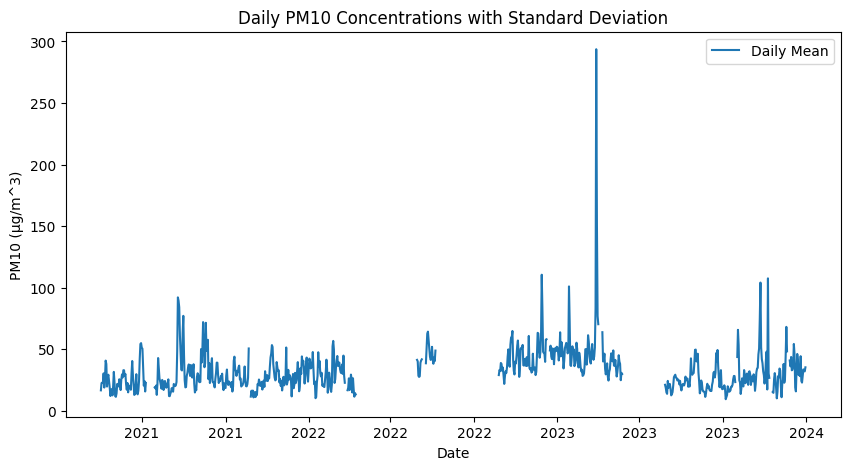

In [89]:
def dailyConcentrations(df, emission):

    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Daily_Average'], label='Daily Mean')
    
    date_form = DateFormatter("%Y")
    plt.gca().xaxis.set_major_formatter(date_form)
    
    plt.title(f'Daily {emission} Concentrations with Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel(f'{emission} (μg/m^3)')
    plt.legend()
    plt.savefig(f'daily_{emission}_concentrations.png')

    plt.show()


dailyConcentrations(df, "PM10")

# Monthly PM10 Concentrations with Standard Deviation


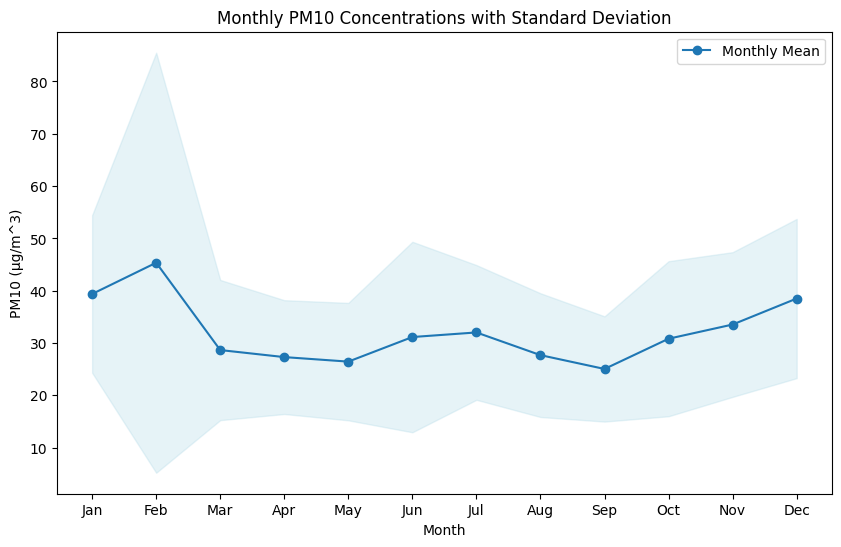

In [90]:
def monthlyConcentrations(df, emission):
    
    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)
    
    df['Month'] = df['Date'].dt.month
    monthly_data = df.groupby('Month')['Daily_Average'].agg(['mean', 'std'])

    plt.figure(figsize=(10, 6))
    plt.plot(monthly_data.index, monthly_data['mean'], marker='o', linestyle='-', label='Monthly Mean')
    plt.fill_between(monthly_data.index, monthly_data['mean'] - monthly_data['std'], monthly_data['mean'] + monthly_data['std'], color='lightblue', alpha=0.3)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.xlabel('Month')
    plt.ylabel(f'{emission} (μg/m^3)')
    plt.title(f'Monthly {emission} Concentrations with Standard Deviation')
    plt.legend()

    plt.savefig(f'monthly_{emission}_concentrations.png')
    plt.show()

monthlyConcentrations(df, "PM10")

# Annual PM10 Concentrations with Standard Deviation


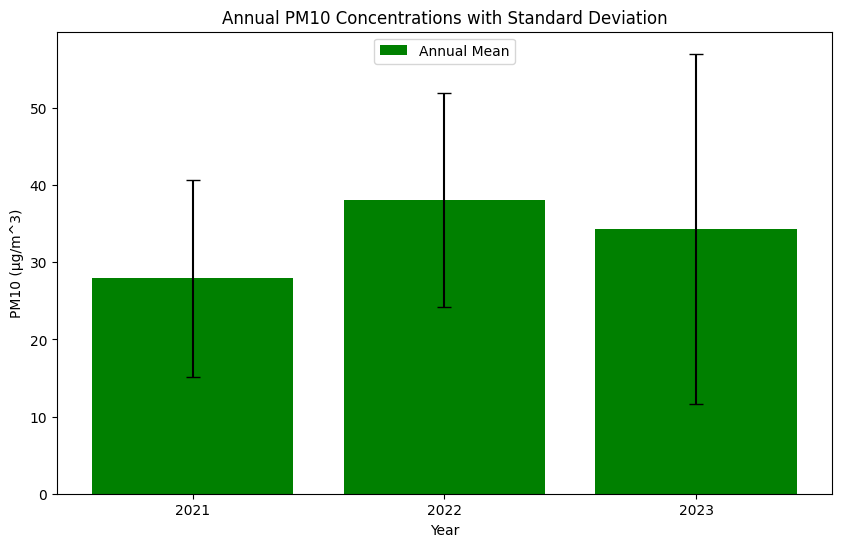

In [91]:
def annualConcentrations(df, emission):

    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)
    df['Year'] = df['Date'].dt.year
    annual_data = df.groupby('Year')['Daily_Average'].agg(['mean', 'std'])
    
    # Plot the annual averages with standard deviation
    plt.figure(figsize=(10, 6))
    plt.bar(annual_data.index, annual_data['mean'], yerr=annual_data['std'], color = 'green', ecolor='black', capsize=5, label='Annual Mean')
    
    plt.xlabel('Year')
    plt.ylabel(f'{emission} (μg/m^3)')
    plt.title(f'Annual {emission} Concentrations with Standard Deviation')
    plt.legend(loc='upper center')
    
    plt.xticks(ticks=annual_data.index, labels=annual_data.index.astype(int))
        
    plt.savefig(f'annual_{emission}_concentrations.png')
    plt.show()
    
annualConcentrations(df, "PM10")

# Monthly Distribution of Daily PM10 Concentrations with Monthly Means


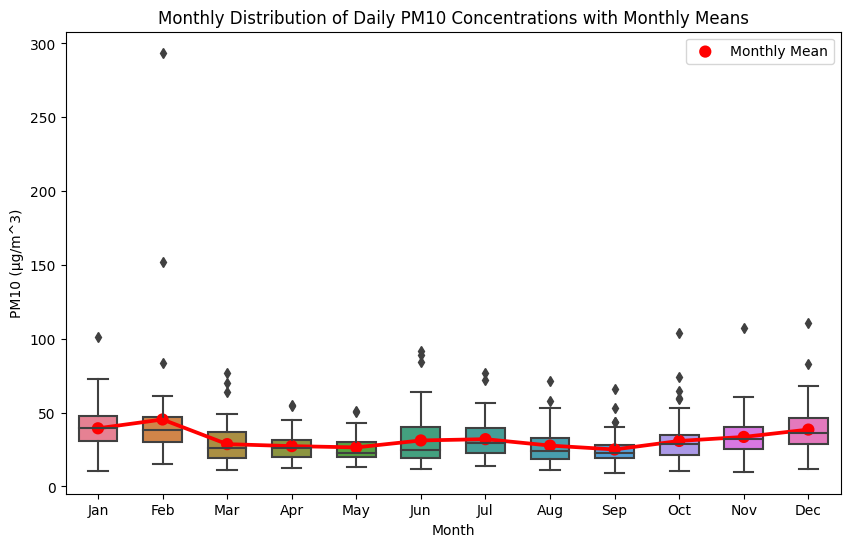

In [92]:
def monthlyDistribution(df, emission):
    
    df['Month'] = df['Date'].dt.month
    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)
    
    monthly_means = df.groupby(['Month'])['Daily_Average'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x=df['Month'], 
                y=df['Daily_Average'], 
                showfliers=True, 
                palette="husl", 
                width=0.6, 
                order=range(1,13))
    
    sns.pointplot(
        data=monthly_means, 
        x='Month', 
        y='Daily_Average', 
        markers="o", 
        color='red', 
        label="Monthly Mean",
        order=range(1, 13),
    )
    
    plt.xlabel('Month')
    plt.ylabel(f'{emission} (μg/m^3)')
    plt.title(f'Monthly Distribution of Daily {emission} Concentrations with Monthly Means')
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    
    plt.savefig(f'monthly_{emission}_distribution.png')
    plt.show()
    
monthlyDistribution(df, 'PM10')

# Mean PM10 Concentration by Day of the Week


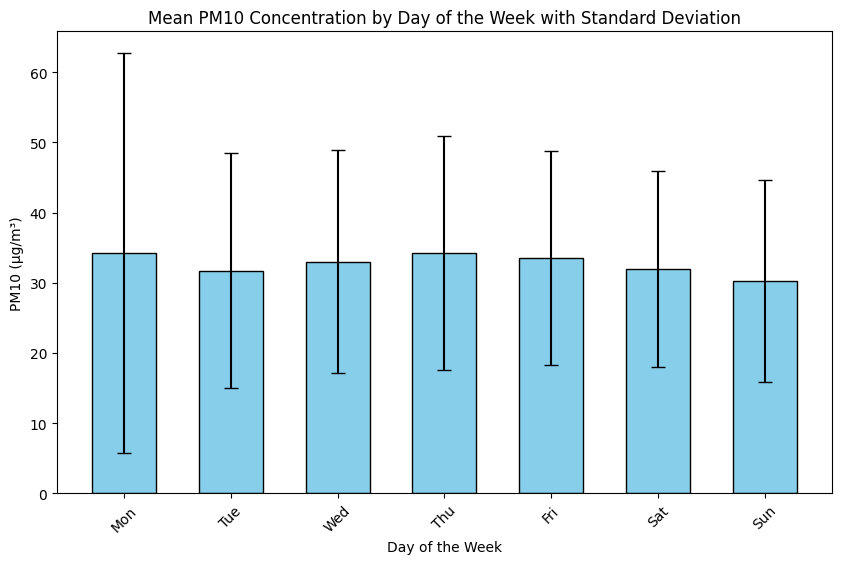

In [93]:
def weeklyDistribution(df, emission):
    
    df['Day'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)
    
    weekly_stats = df.groupby('Day')['Daily_Average'].agg(['mean', 'std', 'count'])
    
    day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    plt.figure(figsize=(10, 6))
    
    # Create bar plot using Matplotlib
    plt.bar(
        weekly_stats.index, 
        weekly_stats['mean'], 
        color='skyblue', 
        width=0.6, 
        edgecolor='black'
    )

    plt.errorbar(
        weekly_stats.index, 
        weekly_stats['mean'], 
        yerr=weekly_stats['std'],  # Using standard deviation as error bars
        fmt='none', 
        color='black', 
        capsize=5
    )

    plt.xlabel('Day of the Week')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Mean {emission} Concentration by Day of the Week with Standard Deviation')

    plt.xticks(ticks=np.arange(7), labels=day_labels, rotation=45)
    
    plt.savefig(f'weekly_{emission}_distribution_with_std.png')
    plt.show()

weeklyDistribution(df, "PM10")


# Trend Analysis of Monthly PM10 Concentrations 


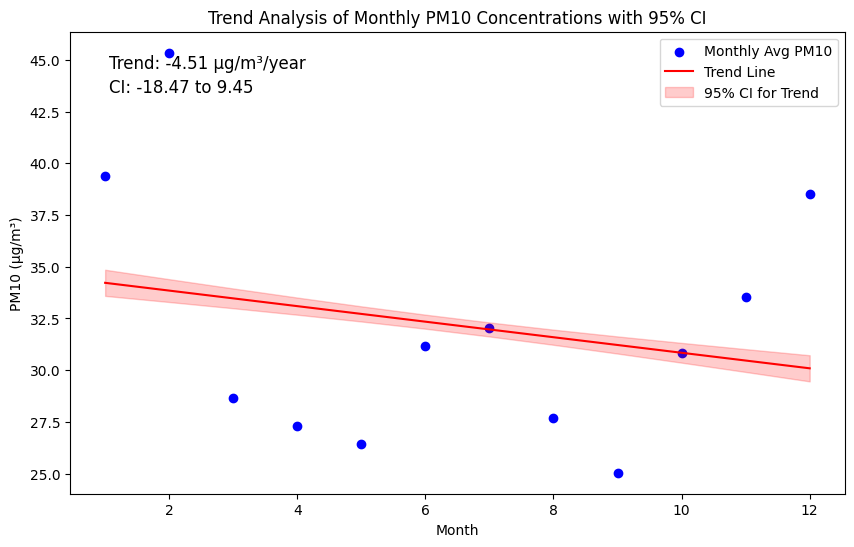

In [94]:
from scipy import stats

def monthlyTrendAnalysis(df, emission):

    # Extract month from the Date column
    df['Month'] = df['Date'].dt.month
    
    # Calculate the monthly average emission concentration
    monthly_avg = df.groupby('Month')['Daily_Average'].mean().reset_index()

    # Scatter plot for monthly data points
    plt.figure(figsize=(10, 6))
    plt.scatter(
        monthly_avg['Month'], 
        monthly_avg['Daily_Average'], 
        color='blue', 
        label=f'Monthly Avg {emission}'
    )
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(monthly_avg['Month'], monthly_avg['Daily_Average'])

    trend_line = intercept + slope * monthly_avg['Month']

    n = len(monthly_avg)  # Number of data points
    t_value = stats.t.ppf(0.975, df=n-2)  # t-value for 95% CI (2-tailed)
    ci = t_value * std_err * np.sqrt(1/n + (monthly_avg['Month'] - np.mean(monthly_avg['Month']))**2 / np.sum((monthly_avg['Month'] - np.mean(monthly_avg['Month']))**2))
    ci_upper = trend_line + ci  # Upper bound of 95% CI
    ci_lower = trend_line - ci  # Lower bound of 95% CI

    plt.plot(monthly_avg['Month'], trend_line, color='red', linestyle='-', label='Trend Line')

    plt.fill_between(monthly_avg['Month'], ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI for Trend')

    slope_annual = slope * 12  # Convert from μg/m³/month to μg/m³/year
    se_slope = std_err * 12  # Standard error of the slope (annualized)
    ci_slope_lower = slope_annual - t_value * se_slope  # Lower bound of 95% CI for slope
    ci_slope_upper = slope_annual + t_value * se_slope  # Upper bound of 95% CI for slope

    trend_text = f'Trend: {slope_annual:.2f} μg/m³/year'
    ci_text = f'CI: {ci_slope_lower:.2f} to {ci_slope_upper:.2f}'
    
    plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
    plt.text(0.05, 0.90, ci_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    plt.xlabel('Month')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Trend Analysis of Monthly {emission} Concentrations with 95% CI')
    plt.legend()

    plt.savefig(f'monthly_trend_analysis_{emission}_concentrations_with_95CI_and_trend.png')
    plt.show()

# Example usage
# Assuming df is your dataframe and "PM10" is the emission type
monthlyTrendAnalysis(df, "PM10")

# Trend Analysis of Monthly PM10 Concentrations (All Months Combined)


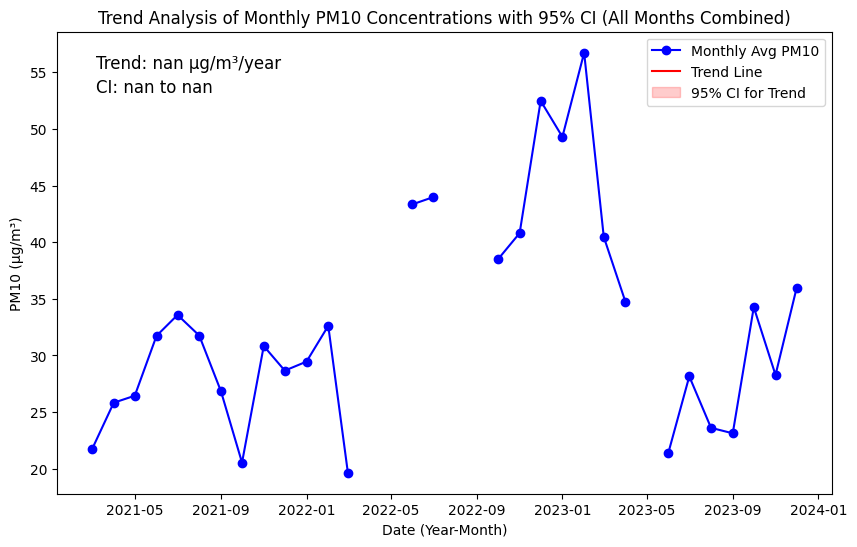

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def monthlyTrendAnalysisAll(df, emission):

    df['Date'] = pd.to_datetime(df['Date'])

    df['YearMonth'] = df['Date'].dt.to_period('M')

    monthly_avg = df.groupby('YearMonth')['Daily_Average'].mean().reset_index()

    monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

    monthly_avg['Months'] = (monthly_avg['YearMonth'].dt.year - monthly_avg['YearMonth'].dt.year.min()) * 12 + monthly_avg['YearMonth'].dt.month

    plt.figure(figsize=(10, 6))
    plt.plot(
        monthly_avg['YearMonth'], 
        monthly_avg['Daily_Average'],
        marker='o',
        color='blue', 
        label=f'Monthly Avg {emission}'
    )
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(monthly_avg['Months'], monthly_avg['Daily_Average'])
    trend_line = intercept + slope * monthly_avg['Months']

    n = len(monthly_avg)  # Number of data points
    t_value = stats.t.ppf(0.975, df=n-2)  # t-value for 95% CI (2-tailed)
    ci = t_value * std_err * np.sqrt(1/n + (monthly_avg['Months'] - np.mean(monthly_avg['Months']))**2 / np.sum((monthly_avg['Months'] - np.mean(monthly_avg['Months']))**2))
    ci_upper = trend_line + ci  # Upper bound of 95% CI
    ci_lower = trend_line - ci  # Lower bound of 95% CI

    plt.plot(monthly_avg['YearMonth'], trend_line, color='red', linestyle='-', label='Trend Line')

    plt.fill_between(monthly_avg['YearMonth'], ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI for Trend')

    slope_annual = slope * 12  # Convert from μg/m³/month to μg/m³/year
    se_slope = std_err * 12  # Standard error of the slope (annualized)
    ci_slope_lower = slope_annual - t_value * se_slope  # Lower bound of 95% CI for slope
    ci_slope_upper = slope_annual + t_value * se_slope  # Upper bound of 95% CI for slope

    trend_text = f'Trend: {slope_annual:.2f} μg/m³/year'
    ci_text = f'CI: {ci_slope_lower:.2f} to {ci_slope_upper:.2f}'
    
    plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
    plt.text(0.05, 0.90, ci_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    plt.xlabel('Date (Year-Month)')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Trend Analysis of Monthly {emission} Concentrations with 95% CI (All Months Combined)')
    plt.legend()

    plt.savefig(f'monthly_trend_analysis_{emission}_concentrations_with_95CI_and_trend.png')
    plt.show()

monthlyTrendAnalysisAll(df, "PM10")

# Trend Analysis of PM10 for Each Month Separately (January – December)


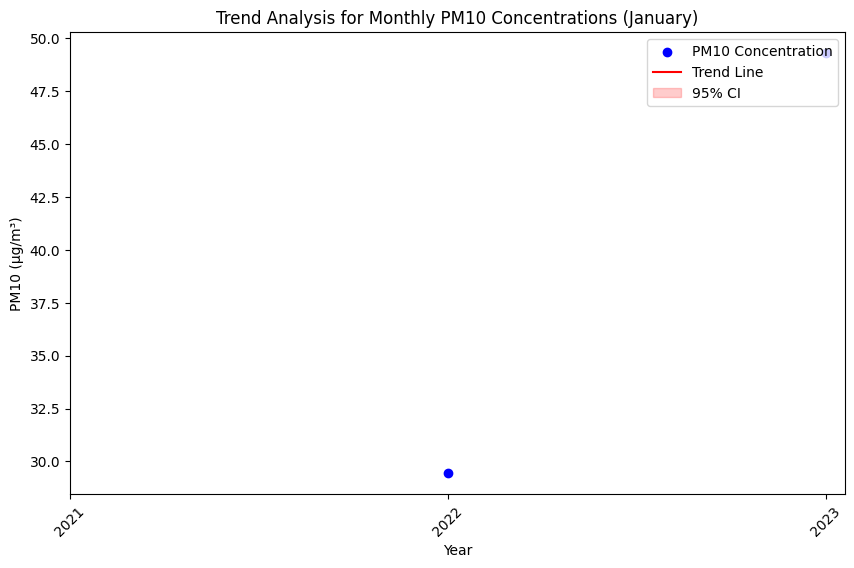

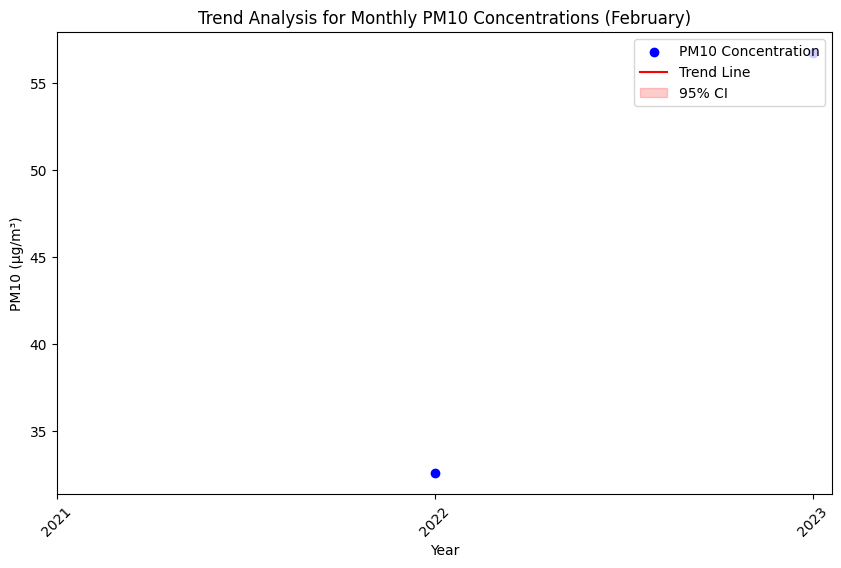

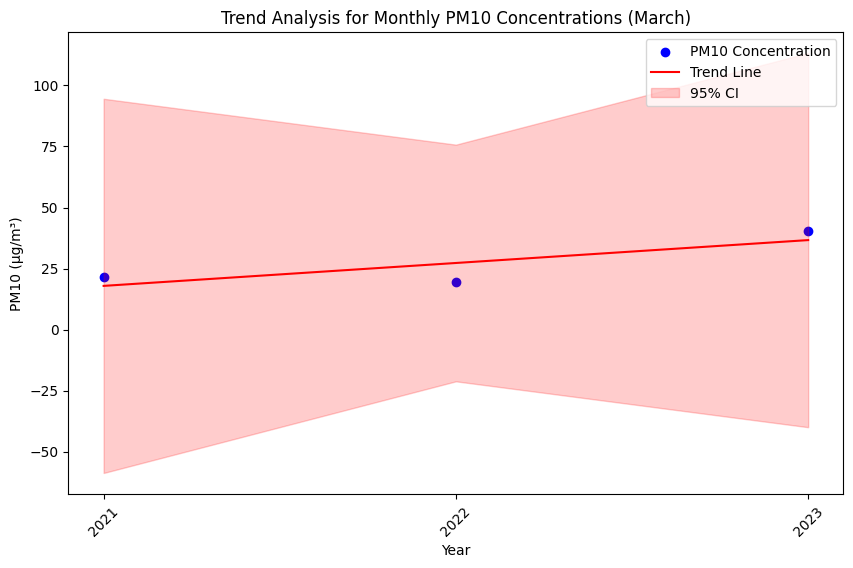

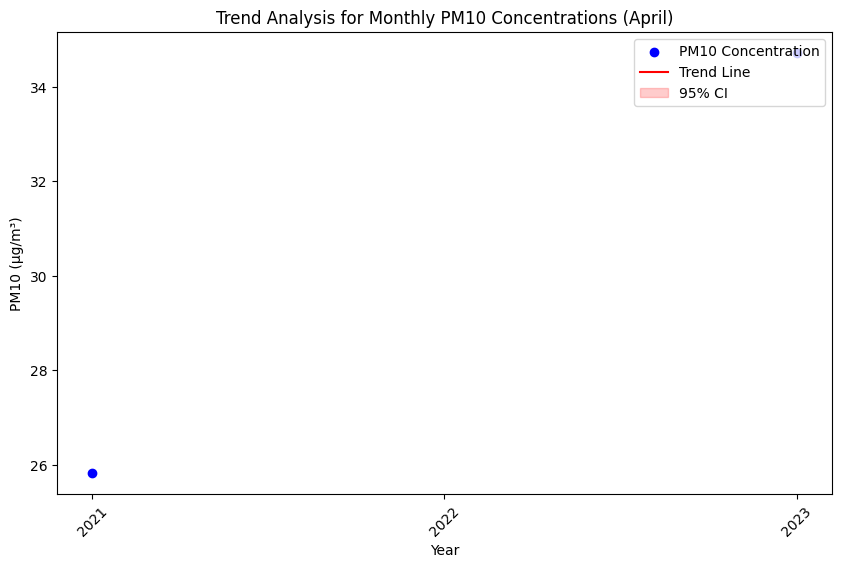

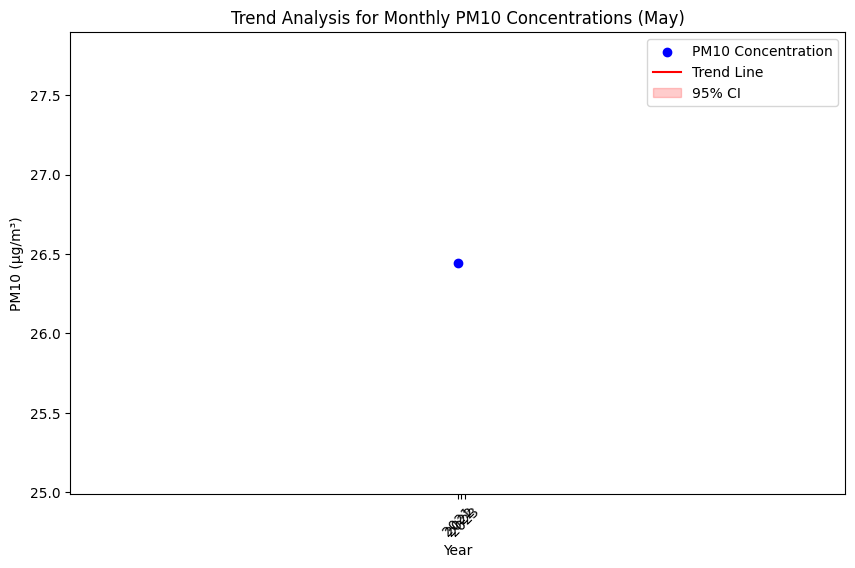

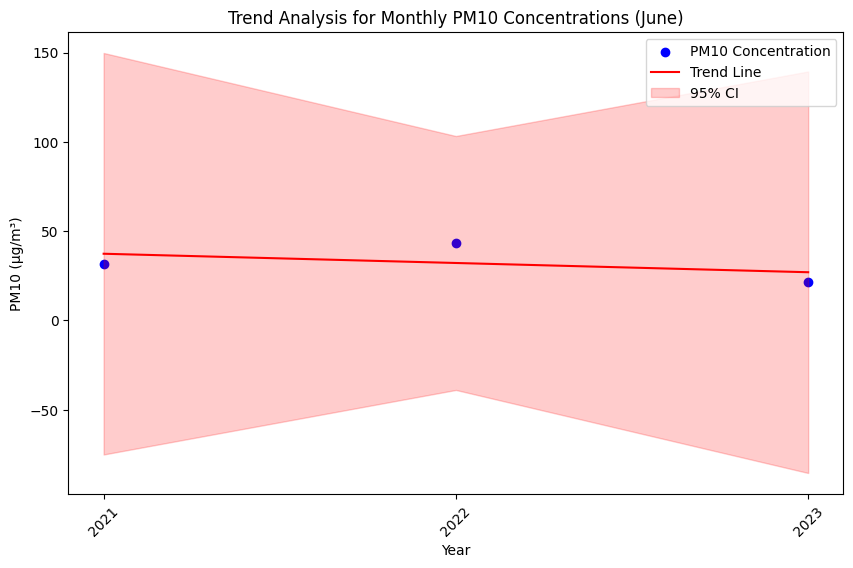

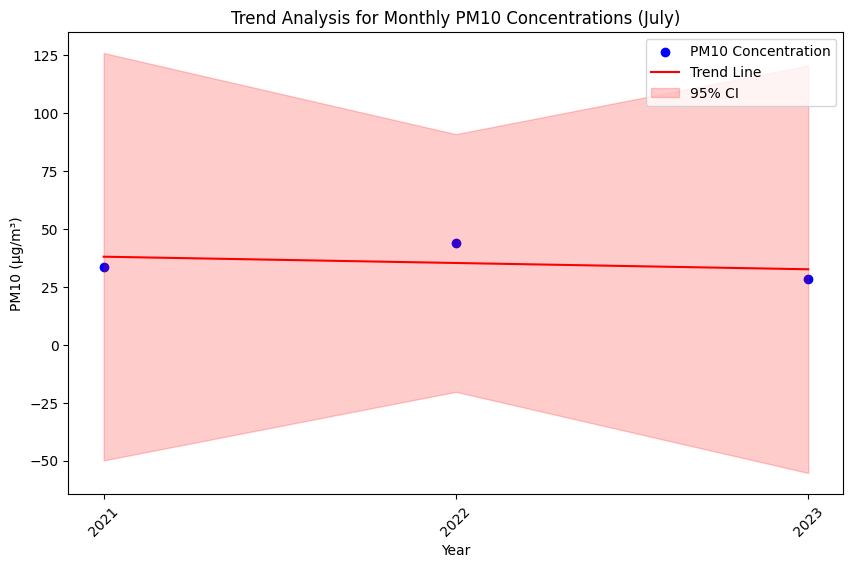

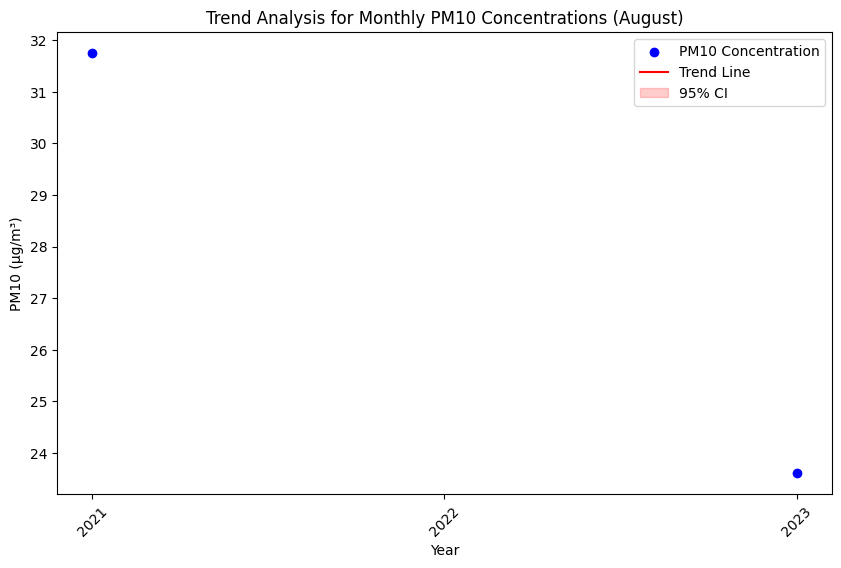

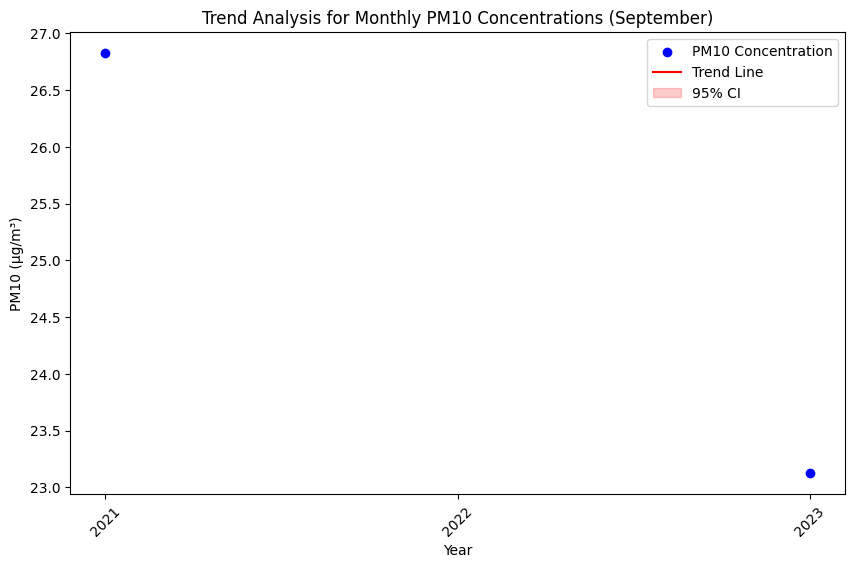

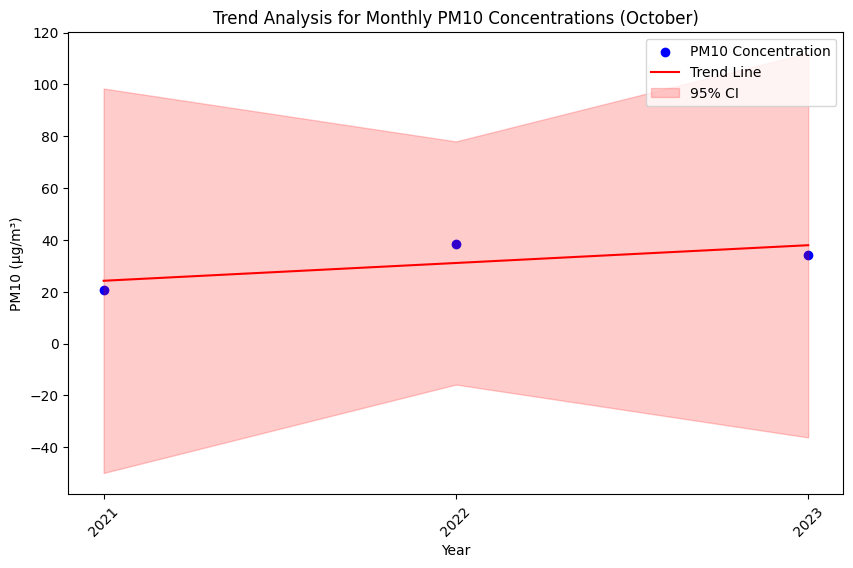

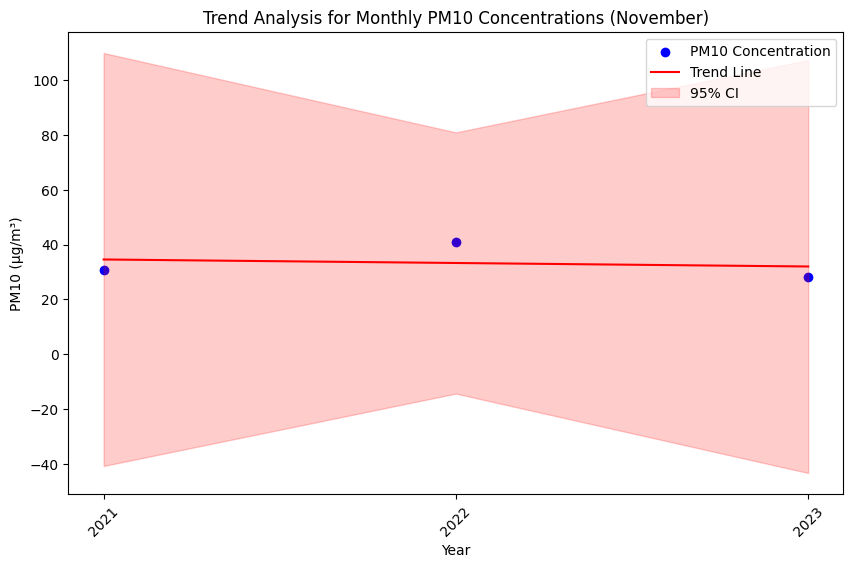

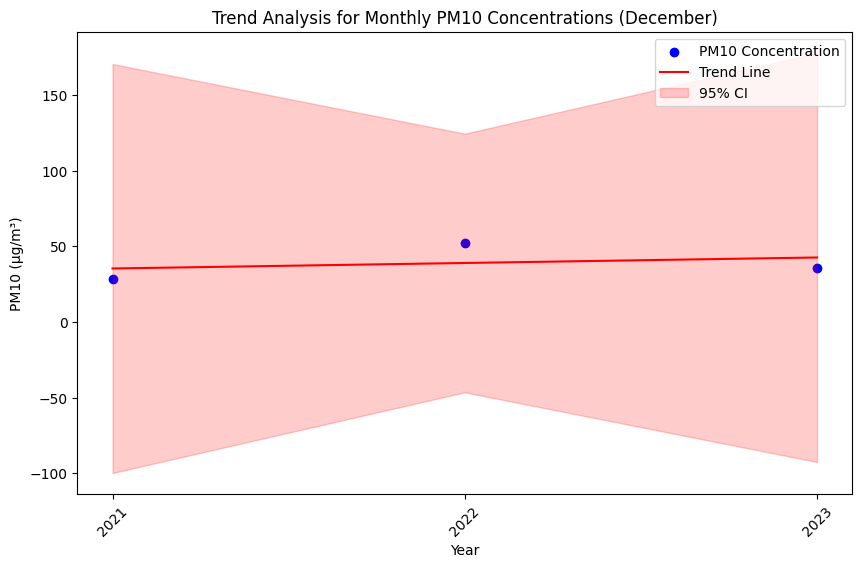

In [96]:
def monthlyTrendAnalysisSingleMonth(df, emission, month):

    # Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract Year and Month
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

    month_data = df[df['Month'] == month]

    yearly_avg = month_data.groupby('Year')['Daily_Average'].mean().reset_index()

    # Fit a linear regression model
    slope, intercept, r_value, p_value, std_err = stats.linregress(yearly_avg['Year'], yearly_avg['Daily_Average'])

    # Calculate the trend line
    trend_line = intercept + slope * yearly_avg['Year']

    # Calculate the 95% confidence interval for the trend line
    n = len(yearly_avg)  # Number of data points
    t_value = stats.t.ppf(0.975, df=n-2)  # t-value for 95% CI (2-tailed)
    ci = t_value * std_err * np.sqrt(1/n + (yearly_avg['Year'] - np.mean(yearly_avg['Year']))**2 / np.sum((yearly_avg['Year'] - np.mean(yearly_avg['Year']))**2))
    ci_upper = trend_line + ci  # Upper bound of 95% CI
    ci_lower = trend_line - ci  # Lower bound of 95% CI

    # Plot the data and trend line
    plt.figure(figsize=(10, 6))
    plt.scatter(yearly_avg['Year'], yearly_avg['Daily_Average'], color='blue', label=f'{emission} Concentration')
    plt.plot(yearly_avg['Year'], trend_line, color='red', linestyle='-', label='Trend Line')
    plt.fill_between(yearly_avg['Year'], ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')

    plt.xticks(yearly_avg['Year'].astype(int), rotation=45)

    month_name = pd.to_datetime(f"2023-{month}-01").strftime("%B")  # Get month name
    plt.title(f'Trend Analysis for Monthly {emission} Concentrations ({month_name})', fontsize=12)
    plt.xlabel('Year')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.legend(loc='upper right')

    plt.savefig(f'monthly_trend_analysis_{emission}_{month_name}.png')
    plt.show()

for i in range(1,13):
    monthlyTrendAnalysisSingleMonth(df, "PM10", month=i)  

# Hourly Distribution of PM10 Concentration with Hourly Means


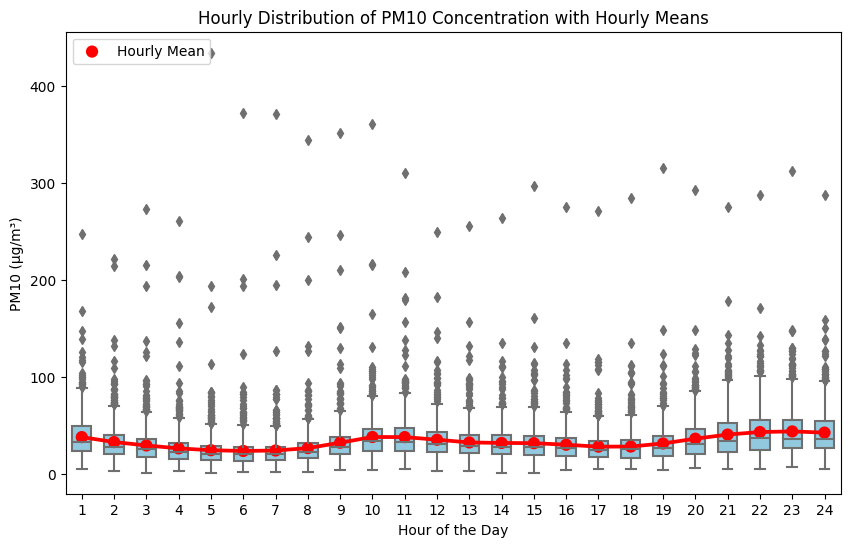

In [97]:
def hourlyDistribution(df, emission):
    df_long = df.melt(id_vars=['Date'], value_vars=range(1, 25), var_name='Hour', value_name='PM10')
    hourly_means = df_long.groupby('Hour')['PM10'].mean().reset_index()

    plt.figure(figsize=(10, 6))

    sns.boxplot(
        x=df_long['Hour'], 
        y=df_long['PM10'], 
        showfliers=True, 
        color="skyblue", 
        width=0.6, 
        order=range(1, 25)
    )
    sns.pointplot(
        data=hourly_means, 
        x='Hour', 
        y='PM10', 
        markers="o", 
        color='red', 
        label="Hourly Mean",
        order=range(1, 25),
    )

    plt.xlabel('Hour of the Day')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Hourly Distribution of {emission} Concentration with Hourly Means')
    plt.xticks(ticks=range(24), labels=[i for i in range(1,25)])  # Label hours as 0:00 to 23:00
    plt.legend(loc='upper left')

    plt.savefig(f'hourly_{emission}_distribution.png')
    plt.show()

hourlyDistribution(df, 'PM10')

# Mean PM10 Concentration by Day of the Week for Each Year


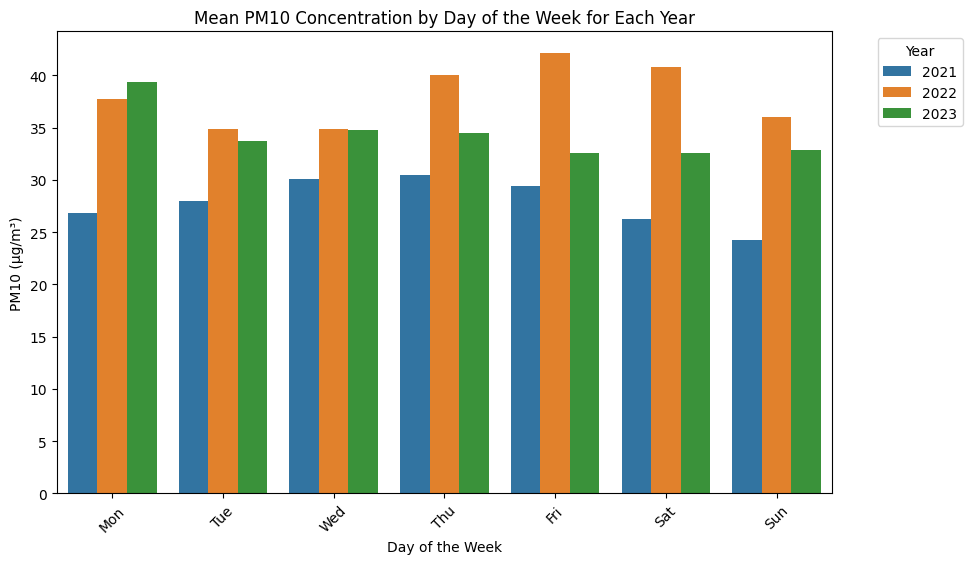

In [98]:
def meanPM10ByDayOfWeek(df, emission):
    df['Date'] = pd.to_datetime(df['Date'])

    df['Year'] = df['Date'].dt.year
    df['DayOfWeek'] = df['Date'].dt.day_name()  # Full day names (e.g., Monday, Tuesday)

    # Calculate the daily average PM10 concentration
    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)

    # Group by Year and Day of the Week to calculate mean PM10 concentration
    grouped_data = df.groupby(['Year', 'DayOfWeek'])['Daily_Average'].mean().reset_index()

    # Define the order of days of the week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Use a bar plot to visualize the data
    sns.barplot(
        x='DayOfWeek', 
        y='Daily_Average', 
        hue='Year', 
        data=grouped_data, 
        order=day_order
    )

    # Add labels and title
    plt.xlabel('Day of the Week')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Mean {emission} Concentration by Day of the Week for Each Year')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

    plt.xticks(ticks=range(7), labels = [day[:3] for day in day_order], rotation=45)
    
    plt.savefig(f'mean_{emission}_by_day_of_week_for_each_year.png')
    plt.show()

meanPM10ByDayOfWeek(df, 'PM10')

# Mean PM10 Concentration by Season for Each Year


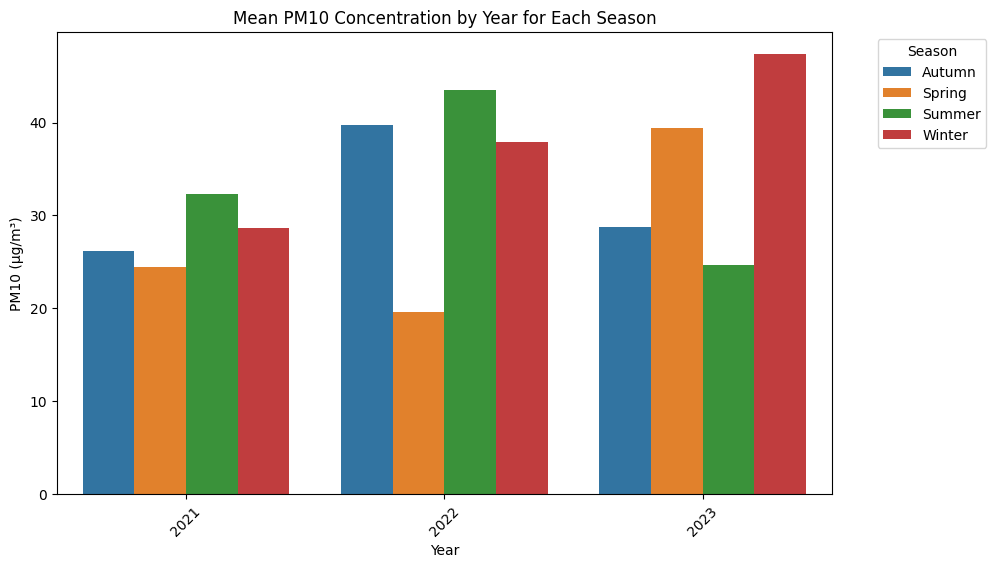

In [99]:
def meanPM10ByYearForEachSeason(df, emission):
    df['Date'] = pd.to_datetime(df['Date'])

    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Autumn'

    df['Year'] = df['Date'].dt.year
    df['Season'] = df['Date'].dt.month.map(get_season)

    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)

    grouped_data = df.groupby(['Year', 'Season'])['Daily_Average'].mean().reset_index()

    season_order = ['Autumn', 'Spring', 'Summer', 'Winter']

    plt.figure(figsize=(10, 6))

    sns.barplot(
        x='Year', 
        y='Daily_Average', 
        hue='Season', 
        data=grouped_data, 
        hue_order=season_order
    )

    plt.xlabel('Year')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Mean {emission} Concentration by Year for Each Season')
    plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

    plt.xticks(rotation=45)
    
    plt.savefig(f'mean_{emission}_by_year_for_each_season.png')
    plt.show()

meanPM10ByYearForEachSeason(df, 'PM10')

# Trend Analysis of Monthly Mean PM10 Concentration with 95% Confidence Interval

# Trend Analysis of Annual Mean PM10 Concentration with 95% Confidence Interval

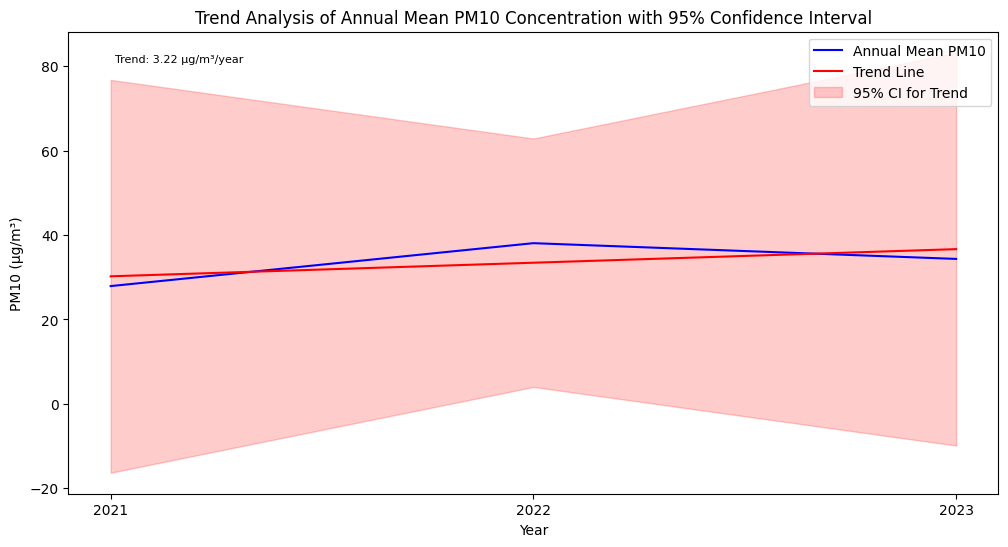

In [100]:
def annualTrendAnalysisWithCI(df, emission):
    df['Date'] = pd.to_datetime(df['Date'])

    df['Year'] = df['Date'].dt.year

    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)

    annual_means = df.groupby('Year')['Daily_Average'].mean().reset_index()

    slope, intercept, r_value, p_value, std_err = stats.linregress(annual_means['Year'], annual_means['Daily_Average'])

    trend_line = intercept + slope * annual_means['Year']

    n = len(annual_means)  # Number of data points
    t_value = stats.t.ppf(0.975, df=n-2)  # t-value for 95% CI (2-tailed)
    ci = t_value * std_err * np.sqrt(1/n + (annual_means['Year'] - np.mean(annual_means['Year']))**2 / np.sum((annual_means['Year'] - np.mean(annual_means['Year']))**2))
    ci_upper = trend_line + ci  # Upper bound of 95% CI
    ci_lower = trend_line - ci  # Lower bound of 95% CI

    plt.figure(figsize=(12, 6))

    plt.plot(annual_means['Year'], annual_means['Daily_Average'], color='blue', label=f'Annual Mean {emission}')

    plt.plot(annual_means['Year'], trend_line, color='red', linestyle='-', label='Trend Line')

    plt.fill_between(annual_means['Year'], ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI for Trend')

    trend_text = f'Trend: {slope:.2f} μg/m³/year'
    plt.text(0.05, 0.95, trend_text, transform=plt.gca().transAxes, fontsize=8, verticalalignment='top', horizontalalignment='left')
    
    plt.xlabel('Year')
    plt.ylabel(f'{emission} (μg/m³)')
    plt.title(f'Trend Analysis of Annual Mean {emission} Concentration with 95% Confidence Interval')
    plt.legend()

    plt.xticks(annual_means['Year'].astype(int))

    plt.savefig(f'annual_trend_analysis_{emission}_with_CI.png')
    plt.show()

annualTrendAnalysisWithCI(df, 'PM10')

# Number of Exceedances of the Daily PM10 Limit (50 µg/m³) Per Year

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


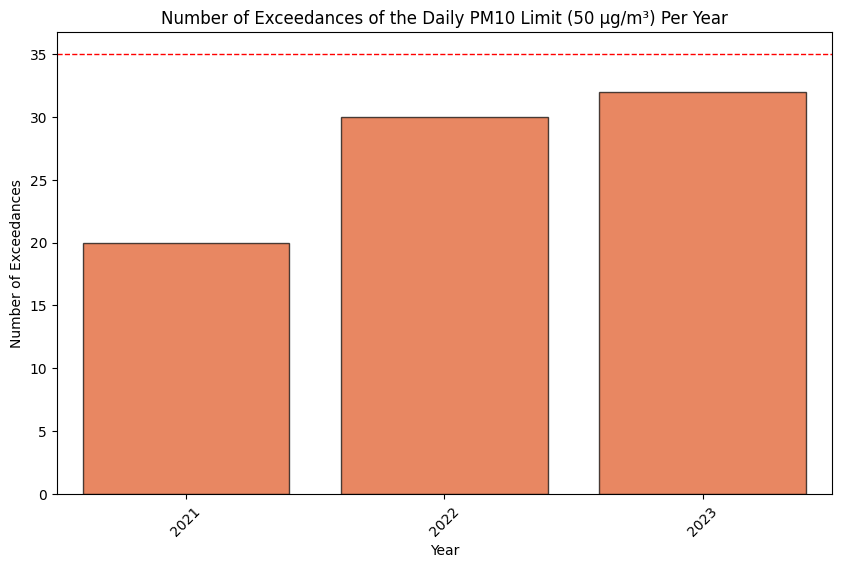

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def exceedancesPerYear(df, emission, limit=50, threshold=None):

    df['Date'] = pd.to_datetime(df['Date'])

    df['Daily_Average'] = df.iloc[:, 1:25].mean(axis=1)

    df['Exceedance'] = df['Daily_Average'] > limit

    df['Year'] = df['Date'].dt.year

    exceedances_per_year = df.groupby('Year')['Exceedance'].sum().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='Year', 
        y='Exceedance', 
        data=exceedances_per_year, 
        color='orangered', 
        alpha=0.7, 
        edgecolor='black',
    )
    if threshold is not None:
        plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1, label=f'Threshold: {threshold}')

    plt.xlabel('Year')
    plt.ylabel(f'Number of Exceedances')
    plt.title(f'Number of Exceedances of the Daily {emission} Limit ({limit} µg/m³) Per Year')
    plt.xticks(rotation=45)

    plt.savefig(f'exceedances_per_year_{emission}.png')
    plt.show()

exceedancesPerYear(df, 'PM10', limit=50, threshold=35)